# 介绍

用代码的形式去理解分类算法

## 原始数据集

这里我们采用 Iris 数据集，即鸢尾花数据集，它是机器学习领域中分厂著名的分类数据集，它3个分类，每个分类50条样本，总共150条样本

In [4]:
from sklearn.datasets import load_iris

In [5]:
iris_data = load_iris()
X = iris_data.data
y = iris_data.target

In [6]:
iris_data.feature_names, iris_data.target_names

(['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'],
 array(['setosa', 'versicolor', 'virginica'], dtype='<U10'))

鸢尾花数据集有4个特征

- 'sepal length (cm)'： 花萼长度
- 'sepal width (cm)'： 花萼宽度
- 'petal length (cm)'：花瓣长度
- 'petal width (cm)'： 花瓣宽度

3种分类：

- 'setosa'：山鸢尾
- 'versicolor'：杂色鸢尾花
- 'virginica'：维尔吉尼卡鸢尾花


In [7]:
X.shape, y.shape

((150, 4), (150,))

特征有150行4列

目标有150行1列

## 扩充数据集

为了是数据集更加适用，我们扩展数据集的记录数并进行打散排序。

In [8]:
import numpy as np

In [9]:
np.random.seed(709)
# shuffle dataset
indics = np.random.permutation(len(X))
X = X[indics]
y = y[indics]
# expand dataset
X_refined = [X]
y_refined = [y]
for _ in range(30):
    rd = np.random.randn(*X.shape)
    X_refined.append(X + rd)
    y_refined.append(y)
X_refined = np.concatenate(X_refined, axis=0)
y_refined = np.concatenate(y_refined, axis=0)

X_refined.shape, y_refined.shape

((4650, 4), (4650,))

## Data Plot

In [13]:
import seaborn as sns
import pandas as pd

(4650, 1)

In [17]:
iris_df = np.concatenate((X_refined, y_refined[:, np.newaxis]), axis=1)
iris_df = pd.DataFrame(iris_df, columns=iris_data.feature_names+['label'])

In [18]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.600000,2.700000,4.200000,1.300000,1.0
1,6.400000,3.200000,4.500000,1.500000,1.0
2,6.700000,3.100000,4.700000,1.500000,1.0
3,7.700000,3.800000,6.700000,2.200000,2.0
4,5.700000,2.800000,4.500000,1.300000,1.0
...,...,...,...,...,...
4645,7.247858,2.867516,4.051827,1.526507,1.0
4646,4.482515,4.161526,2.615723,-0.131494,0.0
4647,5.223526,3.595246,1.476441,-1.388562,0.0
4648,6.938327,3.179509,5.453996,3.215592,2.0


In [20]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
count,4650.000000,4650.000000,4650.000000,4650.000000,4650.000000
mean,5.852737,3.069761,3.748641,1.201879,1.000000
std,1.277549,1.074316,2.000417,1.238845,0.816584
min,1.778418,-1.020268,-1.630071,-3.261181,0.000000
25%,5.000000,2.337311,2.070447,0.330297,0.000000
50%,5.856790,3.038030,4.005724,1.197184,1.000000
75%,6.699110,3.805111,5.281265,2.054318,2.000000
max,10.441426,7.172406,9.568784,5.453987,2.000000


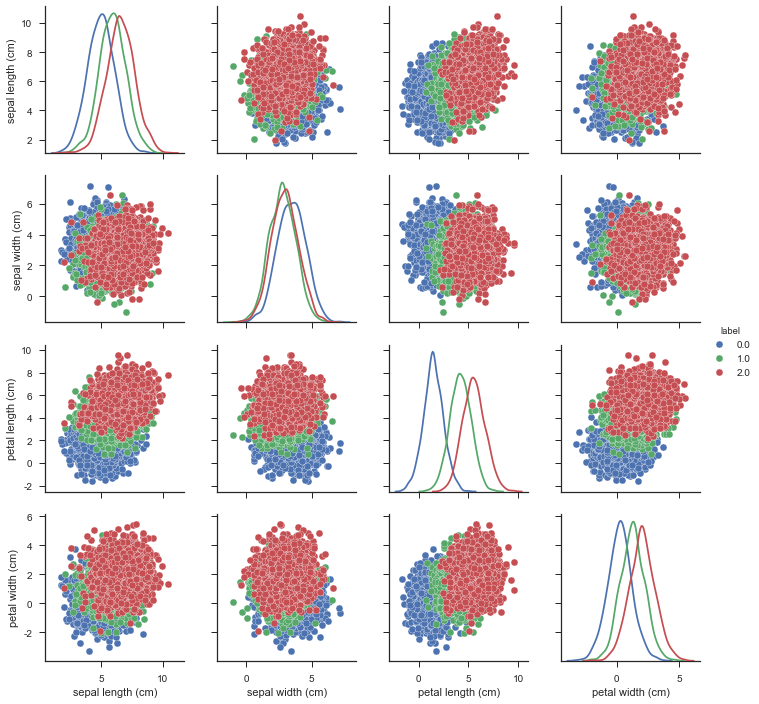

In [22]:
# sns.set(style='ticks', color_codes=True)
sns.pairplot(iris_df,
            vars=iris_df.columns[:-1],
            hue='label',
            diag_kind='kde')

# KNN

In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import numpy as np

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X_refined,
                                                   y_refined,
                                                   test_size=0.2,
                                                   random_state=709)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((3720, 4), (3720,), (930, 4), (930,))

In [25]:
knn = KNeighborsClassifier()

In [27]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [28]:
knn.score(X_test, y_test)

0.7645161290322581

# SVM

In [29]:
from sklearn import svm

In [37]:
svm_linear = svm.SVC(kernel='linear')
svm_rbf = svm.SVC(kernel='rbf', gamma=0.3)
svm_poly = svm.SVC(kernel='poly', degree=3, gamma='auto')

In [38]:
svm_linear.fit(X_train, y_train)
svm_rbf.fit(X_train, y_train)
svm_poly.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [39]:
svm_linear.score(X_test, y_test), \
svm_rbf.score(X_test, y_test), \
svm_poly.score(X_test, y_test)

(0.7752688172043011, 0.7677419354838709, 0.7698924731182796)

# LR_SGD/ElaticNet/LBFS

# Naive Bayes